# Processes

In [31]:
import graphviz

## Multiprocessing
Multiple processes in memory at the same time

Objective: To keep the CPU busy (if a process is blocked, just work on another)

### Degrees of multiprocessing
Number of jobs in memory

### Process States
- New
- Ready 
- Waiting
- Running
- Terminated

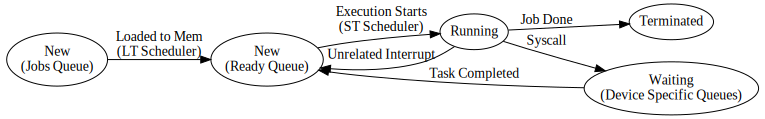

In [47]:
# Process States
states = graphviz.Digraph()
states.attr(rankdir='LR')
states.node('new', label='New\n(Jobs Queue)')
states.node('ready', label='New\n(Ready Queue)')
states.node('running', label='Running')
states.node('waiting', label='Waiting\n(Device Specific Queues)')
states.node('terminated', label='Terminated')
states.edge('new', 'ready', 'Loaded to Mem\n(LT Scheduler)')
states.edge('ready', 'running', 'Execution Starts\n(ST Scheduler)')
states.edge('running', 'ready', 'Unrelated Interrupt')
states.edge('running', 'waiting', 'Syscall')
states.edge('waiting', 'ready', 'Task Completed')
states.edge('running', 'terminated', 'Job Done')
states

## PCB: Process Control Block
Saves the state of a proc

### Suspend (Running -> Ready/Waiting)

Saves info to the PCB

### Restarted (Ready -> Running)

Loads all info from PCB

### Context switching
Act of moving from one proc to another

One cycle of suspend proc `a` + restart proc `b`

## Process Scheduling
Many schedulers involved. Each picks a job from a queue

### Jobs Queue (New processes)
AKA Long-term Scheduler

Picks a job to be loaded into memory when a process terminated. Fires every ~100ms (A very long time)

Each job consists of alternating CPU bursts and IO bursts

CPU bound job requires a few long CPU bursts (and not much IO), IO bound jobs require a few short IO bursts (and not much CPU)

Scheduler tries to get a nice balance of CPU bound and IO bound jobs

### Ready Queue (Ready Processes)
AKA Short-Term Scheduler

Picks a job from the ready queue to be run and dispatches the context switch

### Waiting Queue (Waiting Processes)
One queue per device

Other queues for different events

## Data Structures
### FIFO Linked List
Ideal for a simple scheduler

### More complex schedulers
More complex data structures (some sort of hashtable i'd imagine)

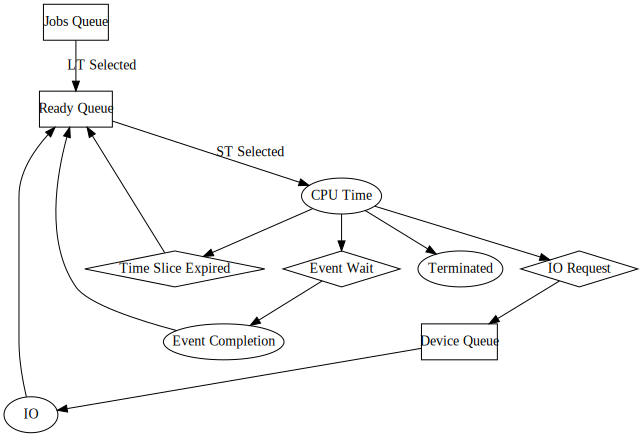

In [54]:
queues = graphviz.Digraph()
queues.node('Jobs Queue', shape='rect')
queues.node('Ready Queue', shape='rect')
queues.node('IO Request', shape='diamond')
queues.node('Device Queue', shape='rect')
queues.node('Time Slice Expired', shape='diamond')
queues.node('Event Wait', shape='diamond')
queues.node('CPU', label='CPU Time')

queues.edge('Jobs Queue', 'Ready Queue', 'LT Selected')
queues.edge('Ready Queue', 'CPU', 'ST Selected')
queues.edge('CPU', 'Terminated')
queues.edge('CPU', 'IO Request')
queues.edge('IO Request', 'Device Queue')
queues.edge('Device Queue', 'IO')
queues.edge('IO', 'Ready Queue')
queues.edge('CPU', 'Time Slice Expired')
queues.edge('Time Slice Expired', 'Ready Queue')
queues.edge('CPU', 'Event Wait')
queues.edge('Event Wait', 'Event Completion')
queues.edge('Event Completion', 'Ready Queue')
queues

## Resource Permissions
1. Can get resources directly from the OS
2. Can get resources delegated from the parent process (restricted to a subset of parent's permissions)